The goal of this project is to make a rudementary linear regression model that uses the flipper length of penguins to predict their mass. I begin with the standard imports.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#dataset
dataset = "penguins"

I like to keep all my feature engineering and the like in one function for the sake of organization.

In [3]:
#main function
def load(data):
    df = sns.load_dataset(data)
    #drop NaNs
    df.dropna(inplace = True)
    return df

In [4]:
#load the dataset and head
penguins = load(dataset)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


I create a regression plot using the dependent variable (mass) and the independent variable (flipper length). I also set the labels.

Text(0, 0.5, 'Body Mass')

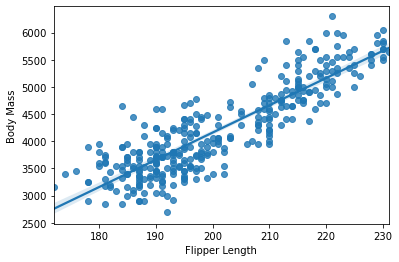

In [5]:
#create regplot
sns.regplot(x = "flipper_length_mm", y = "body_mass_g", data = penguins,
           fit_reg = True)
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")

I create the feature matrix and target array here, which I will use to make the test and training sets for the model. 

In [6]:
#create the feature matrix
X_penguins = penguins["flipper_length_mm"]
print("The shape of the feature matrix: ", X_penguins.shape)
#create the target array
y_penguins = penguins["body_mass_g"]
print("The shape of the target array: ", y_penguins.shape)

The shape of the feature matrix:  (333,)
The shape of the target array:  (333,)


Here I instantiate the model using LinearRegression from the Scikit-learn library.

In [7]:
#instantiate the model with default parameters
model = LinearRegression()

I split the data into training and testing sets, using a 4/5 ratio with 80% being for training, 20% being for testing.

In [8]:
#I make the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins,
                                                   test_size = 0.2)

I fit the model with the training data. I reshape X_train into a vector, which is required to be fitted to the model.

In [9]:
#I fit the model
X_train = X_train[:, np.newaxis]
model.fit(X_train, y_train)

<ipython-input-9-6c22221fb7fc>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]


LinearRegression()

I reshape the test data, and calculate the r2 scores for the testing and training data. Simply put, the r2 score is the difference between the samples and the predictions made by the model. As such, we would hope that the scores for the testing and training data would be similar, and indeed they are.

In [10]:
X_test = X_test[:, np.newaxis]
training_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print("Training r2: ", training_r2)
print("Test r2: ", test_r2)

Training r2:  0.7636211037383014
Test r2:  0.7530749682636367


<ipython-input-10-dee47b196cc2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


Here I have the model take the X_test data and have it predict the values in y_pred. I then make a dataframe to compare the predicted and actual values with the index as the mass in grams.

In [11]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results

,Actual,Predicted
35,4150.0,3945.205916
184,3350.0,3493.028060
131,3500.0,3995.447900
268,5100.0,4799.319643
132,3500.0,3794.479964
...,...,...
24,3800.0,3141.334173
189,4800.0,4648.593691
272,4400.0,4648.593691
177,4150.0,3995.447900
